APRESENTAÇÃO 

A presente coleção de dados não engloba a totalidade dos passageiros, estima-se que 2400 pessoas estavam a bordo. A coleção de dados apresenta informações de 216 passageiros na 1ª classe, 184 na segunda e 491 na terceira, 891 pessoas, representando 37,12% do total.

Perguntas a serem respondidas:
1- Da presente amostragem, quantas pessoas sobreviveram ao desastre? Quantas morreram?
2- Que fatores foram considerados importantes para sobrevivência? A classe, sexo e idade 
foram fatores importantes?
3- A idade influenciou no fator sobrevivência?
4- Pessoas que viajaram com a família tiverem mais ou menos chances?

VARIÁVEIS

Survived (Sobreviveu): 0 = Não, 1 = Sim
Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
Sex (Sexo): Sexo do passageiro
Age (Idade): Idade em anos
Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
Parch: Quantidade de pais / crianças a bordo do Titanic
Ticket (Bilhete): Número do bilhete de embarque
Fare (Tarifa): Tarifa paga pelo Passageiro
Cabin (Cabine): Número de cabine
Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)




 





In [135]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings ('ignore')
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline


In [92]:
df = pd.read_csv('titanic-data-6.csv')

In [93]:
#definindo a matriz de estudo
print('Número de linhas:', df.shape[0])
print('Número de colunas:', df.shape[1])

Número de linhas: 891
Número de colunas: 12


In [94]:
#encontrar os 5 primeiros valores 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [95]:
#encontrar os últimos 5 valores 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [96]:
#Limpeza dos dados
#Remover as colunas desnecessárias
def remove(colunas):
    for i in range(0, len(colunas)):
        df.drop([colunas[i]],axis = 1, inplace = True)
    return df.head()
#Colunas a serem removidas
colunas = ['Fare','Ticket','Cabin','Embarked']
#Chama a funcao e passa o parâmetro das colunas a serem removidas
remove(colunas)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0


Retiramos as células que não farão diferença no presente estudo, como: Fare(tarifa), Ticket(Bilhete do Embarque), Cabin(Número da Cabine) e Embarked(Cidade onde a pessoa embarcou)

In [97]:
#encontrar os tipos das variáveis 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [98]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
dtype: int64

In [99]:
#descrever colunas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch'],
      dtype='object')

In [100]:
#contar valores sobreviventes e não sobreviventes 
print('Sobreviveram:', df['Survived'].value_counts()[1])
print('Não Sobreviveram:', df['Survived'].value_counts()[0])

Sobreviveram: 342
Não Sobreviveram: 549


Text(0, 0.5, '')

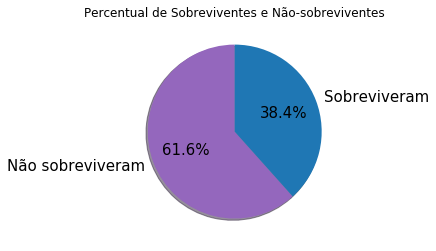

In [101]:
#gerar gráfico
df['Survived'].value_counts().plot.pie(colors=('tab:purple','tab:blue'),
                                           title='Percentual de Sobreviventes e Não-sobreviventes',
                                           fontsize=15, shadow = True, startangle=90, autopct='%1.1f%%',
                                           labels = ('Não sobreviveram','Sobreviveram'),
                                           figsize=(6,4)).set_ylabel('')

O número de sobreviventes foi pequeno, menos da metade, não havia botes suficientes para todos os passageiros, apenas 14 com capacidade total para 65 passageiros, a equipe não foi treinada para situações de risco ou naufrágio, isso porque na época acreditava-se que "nada poderia afundar o Titanic".

In [102]:
#somar valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [103]:
#verificar quantidade de valores nulos na variável idade 
print('Passageiros sem idade preenchida:',df['Age'].isnull().sum())
print('Passageiros com idade preenchida:', (df['Age'].count()))

Passageiros sem idade preenchida: 177
Passageiros com idade preenchida: 714


In [110]:
#encontrar a média de idade dos passageiros
print('Média de idade dos tripulantes:',df['Age'].mean(),'Anos')

Média de idade dos tripulantes: 29.69911764705882 Anos


In [104]:
#preencher os valores faltantes em Idade com a média 
df.fillna(df['Age'].mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0
5,6,0,3,"Moran, Mr. James",male,29.70,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0


Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

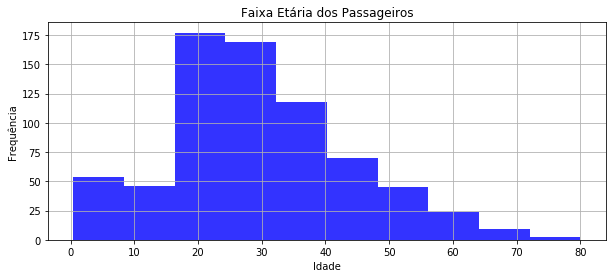

In [105]:
#gerar histograma da frequência das idades  
plt.figure();
df.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

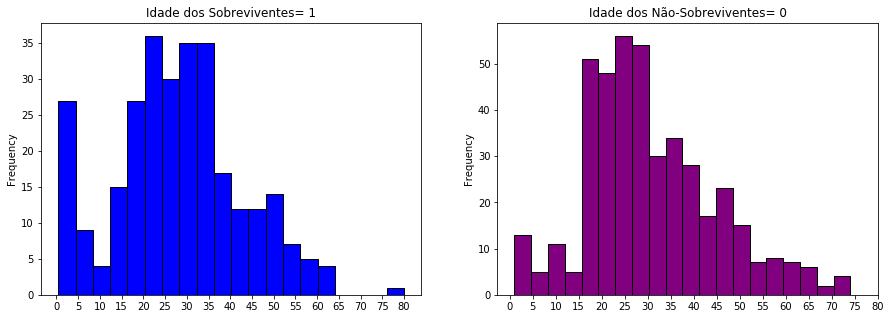

In [107]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[df['Survived']==1].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='blue')
ax[0].set_title('Idade dos Sobreviventes= 1')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==0].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='purple')
ax[1].set_title('Idade dos Não-Sobreviventes= 0')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Foram retirados os valores que não estavam com idade preenchida na época muitas pessoas não tinham 
documentação apropriada, muitas vezes sem registro da data de nascimento, foi realizado o preenchimento com a
média dos valores para prosseguimento da análise. 
elos gráficos podemos ver que muitos dos sobreviventes eram crianças e pessoas entre 20 a 35 anos, os passageiros idosos não foram socorridos, a quase totalidade da faixa acima de 64 anos morreu no naufrágio. 

Text(0.5, 1.0, 'Gráfico de Densidade Sobrevivência x Idade')

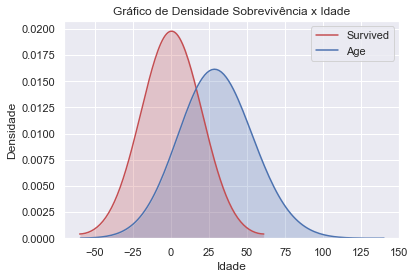

In [241]:
import seaborn as sns
ax = sns.kdeplot(df['Survived'], shade= True, color='r', bw=20)
ax = sns.kdeplot(df['Age'], shade=True, color='b', bw=20)
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Gráfico de Densidade Sobrevivência x Idade')

In [242]:
#realizar contagem dos sobreviventes diferenciando do sexo 
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

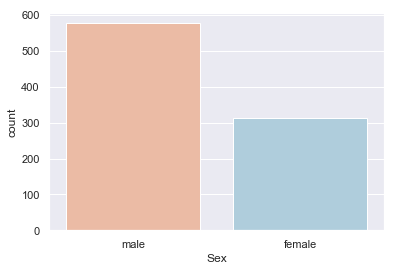

In [243]:
sns.countplot(x='Sex', data=df, palette ='RdBu')

Text(0, 0.5, '')

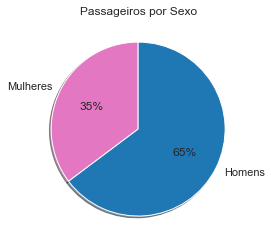

In [253]:
df.groupby('Sex').count()['PassengerId'].plot.pie(title='Passageiros por Sexo',
                                                colors=('tab:pink','tab:blue'), figsize=(6,4), labels=('Mulheres','Homens'),
                                                startangle=90, autopct='%1.0f%%', shadow=True).set_ylabel('')

Text(0, 0.5, 'Quant.')

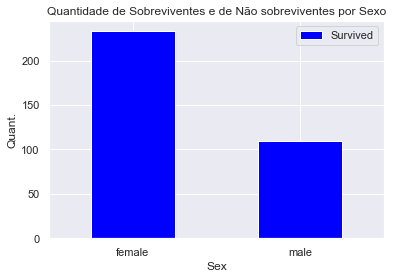

In [245]:
df.pivot_table(index=('Sex'), values=('Survived'), aggfunc=np.sum)[['Survived']].plot(kind='bar', rot=0, 
    colors=('blue'), stacked=True,
    title='Quantidade de Sobreviventes e de Não sobreviventes por Sexo').set_xlabel('Sex')
plt.ylabel('Quant.')

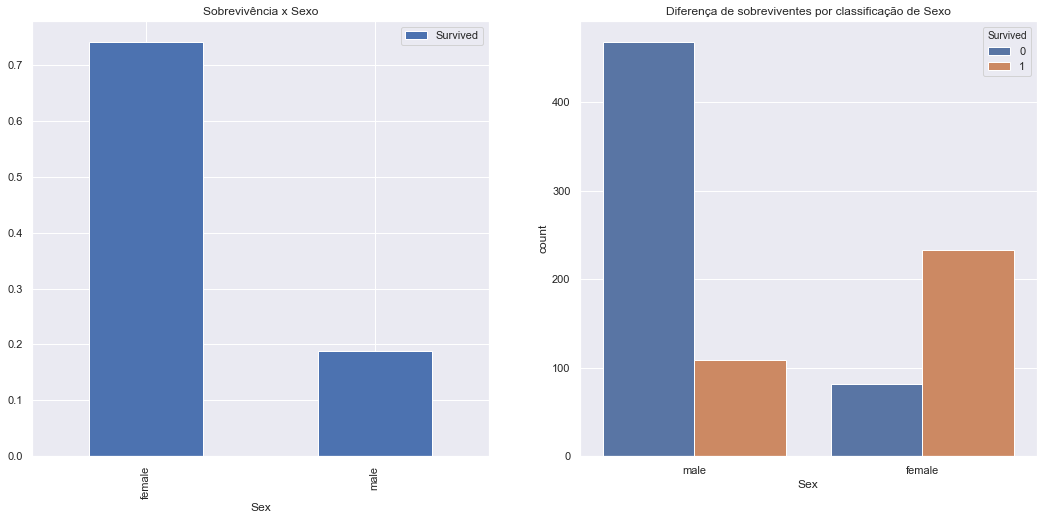

In [246]:
#gerar histograma da diferença dos sobreviventes por diferença de sexo 
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sobrevivência x Sexo')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Diferença de sobreviventes por classificação de Sexo')
plt.show()

Seguindo o código de conduta Birkenhead Drill de 1852, pelo qual as vidas de mulheres e crianças deveriam ser salvas primeiro em uma situação que ameaça a vida, conforme informações do naufrágio, a ordem foi mal-interpretada por um Capitão como "apenas mulheres e crianças", chegando inclusive a não autorizar tripulantes do sexo masculino a entrarem nos botes, explicando-se porque mesmo sendo menos da metade dos passageiros homens, foram mais do que o dobro dos sobreviventes, os gráficos também mostram que a taxa de sobrevivência de crianças foi alta.

Text(0, 0.5, 'Quantidade')

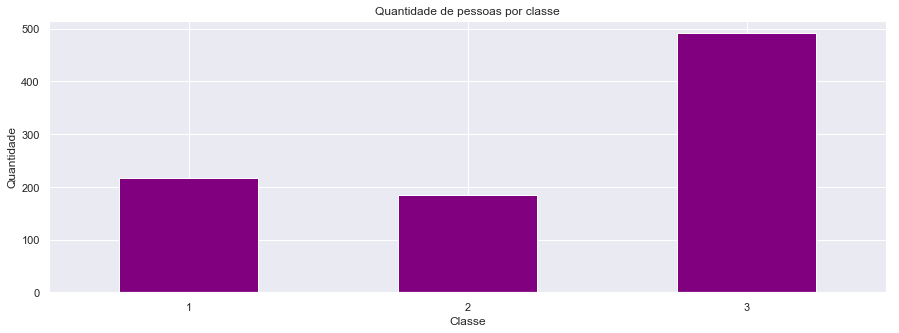

In [247]:
#gráfico visualização quantidade de pessoas x classe 
df.pivot_table(index='Pclass', values='PassengerId', aggfunc='count').plot(kind='bar', figsize=(15,5), legend=None,
                                                                          title='Quantidade de pessoas por classe', color='purple',
                                                                          rot=0).set_xlabel('Classe')
plt.ylabel('Quantidade')

In [248]:
#somar a quantidade de sobreviventes por classe 
df[df['Survived']==1].groupby('Pclass').sum()['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Text(0, 0.5, 'Quantidade')

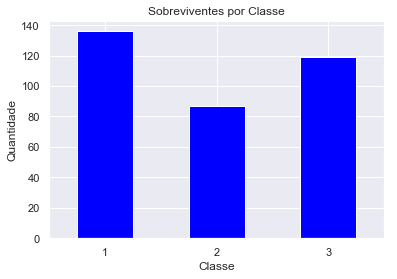

In [249]:
#gráfico tipo Bar para visualização da quantidade de sobreviventes x classe
df[df['Survived']==1].groupby('Pclass').sum()['Survived'].plot(kind='bar', title = 'Sobreviventes por Classe', 
                                                            color='blue', rot=0).set_xlabel('Classe')
plt.ylabel('Quantidade')

Conforme o estudo, o maior percentual de passageiros que se salvaram foram os da 1 ª classe isso porque
"O tratamento recebido dependia da posição social; os comissários da primeira classe cuidavam cada um de apenas 
algumas cabines, então eles podiam ajudar os passageiros a se vestirem e irem para o convés, enquanto os comissários 
da segunda e terceira classe tinham de percorrer várias cabines rapidamente, rudemente acordar os passageiros e mandá-los
colocarem coletes salva-vidas. Apesar das ordens, muitos passageiros e tripulantes estavam relutantes em atender os 
pedidos, por não acreditarem que o Titanic estava em perigo ou por não quererem sair no frio da noite. 
Não foi dito que o navio estava afundando, porém algumas pessoas perceberam que ele estava inclinando."
"Muito poucas pessoas da terceira classe tinham conseguido chegar ao convés superior, com a maioria se perdendo nos 
labirintos de corredores ou ficando presos atrás de grades que segregavam as acomodações da terceira classe daquelas da 
primeira e segunda. Aparentemente em pelo menos em alguns lugares, a tripulação do Titanic ativamente impediu que os 
passageiros da terceira classe escapassem, com barreiras trancadas e vigiadas por tripulantes a fim de impedir que as pessoas corressem para os botes

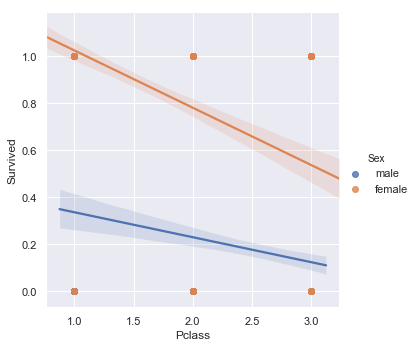

In [250]:
sns.lmplot(x='Pclass', y='Survived', data=df, hue='Sex',size =5,scatter=True, legend='Comparação Sobreviventes por Sexo')

In [251]:
#definir a correlação entre as variáveis
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00


Text(0.5, 1.0, 'Correlação')

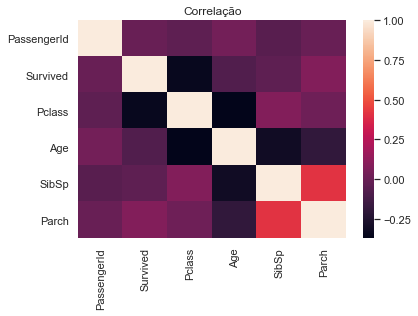

In [252]:
#montar gráfico de calor com a correlação dos dados 
corr = df.corr()
sns.heatmap(corr)
plt.title('Correlação')

In [201]:
#somar Quantidade de irmãos / cônjuges a bordo do Titanic
df['SibSp'].sum()

466

In [199]:
#realizar gráfico de tabela cruzada 
pd.crosstab([df.SibSp],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0, 0.5, 'Quant.')

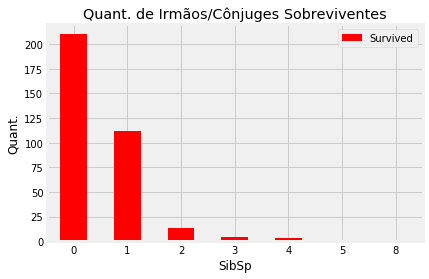

In [185]:
df.pivot_table(index=('SibSp'), values=('Survived'), aggfunc=np.sum)[['Survived']].plot(kind='bar', rot=0, 
    colors=('red'), stacked=True,
    title='Quant. de Irmãos/Cônjuges Sobreviventes').set_xlabel('SibSp')
plt.ylabel('Quant.')

In [203]:
#somar Quantidade de pais / crianças a bordo
df['Parch'].sum()

340

In [36]:
#realizar tabela cruzada dos dados por classe 
pd.crosstab(df.Parch,df.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0, 0.5, 'Quant.')

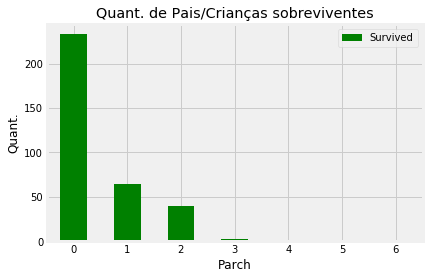

In [183]:
#gráfico com a quantidade de sobreviventes da variável "Quantidade de pais/crianças a bordo"
df.pivot_table(index=('Parch'), values=('Survived'), aggfunc=np.sum)[['Survived']].plot(kind='bar', rot=0, 
    colors=('green'), stacked=True,
    title='Quant. de Pais/Crianças sobreviventes').set_xlabel('Parch')
plt.ylabel('Quant.')

O gráfico Heatmap de correlação mostra que há pouca correlação entre as variáveis, sendo a maior a correlação entre irmãos 
e parentes (0,41), das famílias sobreviventes, a maior chance de sobrevivência foi entre famílias pequenas (até 4 parentes)
provavelmente sendo mais fácil de se ajudarem mutuamente em uma situação de risco, famílias grandes
tiveram taxas baixas de sobrevivência (tendo sido possível que muitos tentaram encontrar a família para embarcarem nos botes
e não conseguiram se salvar), o que revela que no caso do Titanic o que colaborou para a sobrevivência foi o favo-
recimento de pessoas da 1ª classe na distribuição e acesso aos botes e a política marítima do Birkenhead.
Obs: Não foi possível encontrar o nome de Mallvina Dean, última sobrevivente do Titanic, que faleceu em 2009.

In [254]:
df[df['Name']=='Millvina Dean']['Age']

Series([], Name: Age, dtype: float64)

Conclusão: 
Enquanto foi projetado para ser um luxuoso navio, pouca atenção foi dada à segurança dos passageiros, sendo retirados botes para não atrapalhar a "estética" e treinamentos de segurança tendo sido cancelados, motivo da pequena taxa de sobrevivência, 
a tripulação não estava preparada para uma evacuação de emergência, a quantidade de botes poderia ter salvo mais pessoas, porém muitos saíram com quantidade de pessoas menor que poderia abrigar, muitas vidas poderiam ter sido salvas com um treinamento adequeado da tripulação. A maioria dos sobreviventes foram mulheres, crianças e passageiros da primeira classe, no caso das 
variáveis a correlação não implicou causalidade, o que ajudou na sobrevivência foi a regra de se salvarem mulheres e crianças primeiro e o fato dos passageiros da primeira classe terem tido ajuda da tripulação e mais facilidade na hora de se retirarem do navio. A alta taxa de mortalidade mostra como o navio estava despreparado para situações atípicas de risco. Após o desastre do Titanic muitas regras de segurança, treinamentos e equipamentos foram alterados e exigidos. 
Fonte: Wikipedia.com

